In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [2]:
from config import CLIENT_SECRET, CLIENT_ID

In [3]:
#get the spotify creditials by creating a spotify develepers account and requesting api key
client_credentials_manager = SpotifyClientCredentials(client_id = CLIENT_ID, client_secret = CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [4]:
import requests
import json
import pandas as pd
from pprint import pprint

In [5]:
#playlist link from spotify
playlist_1_link = "https://open.spotify.com/playlist/1QLsUTyXoPdP0iC9RzWet8?si=4baecc9af14c4c73"
#getting the uri for the playlist by using split, grabs the string after the slash and seperates the 
#items in a list after each question mark that appears in that string. The 0 grabs the first item in the list
playlist_1_uri = playlist_1_link.split("/")[-1].split("?")[0]


In [6]:
#making api call for playlist track information from the playlist link/uri
spotify_1 = sp.playlist_tracks(playlist_1_uri)
spotify_2 = sp.playlist_tracks(playlist_1_uri, offset = 100)
spotify_3 = sp.playlist_tracks(playlist_1_uri, offset = 200)

In [7]:
#example json api call
spotify_1["items"][3]["track"]

{'album': {'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02'},
    'href': 'https://api.spotify.com/v1/artists/06HL4z0CvFAxyc27GXpf02',
    'id': '06HL4z0CvFAxyc27GXpf02',
    'name': 'Taylor Swift',
    'type': 'artist',
    'uri': 'spotify:artist:06HL4z0CvFAxyc27GXpf02'}],
  'available_markets': ['CA', 'US'],
  'external_urls': {'spotify': 'https://open.spotify.com/album/7mzrIsaAjnXihW3InKjlC3'},
  'href': 'https://api.spotify.com/v1/albums/7mzrIsaAjnXihW3InKjlC3',
  'id': '7mzrIsaAjnXihW3InKjlC3',
  'images': [{'height': 640,
    'url': 'https://i.scdn.co/image/ab67616d0000b2732f8c0fd72a80a93f8c53b96c',
    'width': 640},
   {'height': 300,
    'url': 'https://i.scdn.co/image/ab67616d00001e022f8c0fd72a80a93f8c53b96c',
    'width': 300},
   {'height': 64,
    'url': 'https://i.scdn.co/image/ab67616d000048512f8c0fd72a80a93f8c53b96c',
    'width': 64}],
  'name': 'Taylor Swift',
  'release_date': '2006-10-24',
  

In [8]:
#checking if I captured all the songs in the playlist
print(spotify_1["items"][-1]["track"]["name"])
print(spotify_2["items"][-1]["track"]["name"])
print(spotify_3["items"][-1]["track"]["name"])

Blank Space - Voice Memo
Message In A Bottle (Fat Max G Remix) (Taylor’s Version)
You’re Losing Me (From The Vault)


In [9]:
#getting all the song uri's from the playlist
track_1_uris = [x["track"]["uri"] for x in spotify_1["items"]]
track_2_uris = [x["track"]["uri"] for x in spotify_2["items"]]
track_3_uris = [x["track"]["uri"] for x in spotify_3["items"]]

In [10]:
# seeing what the api call for audio features has to offer for one song
sp.audio_features(["0Om9WAB5RS09L80DyOfTNa", "73OX8GdpOeGzKC6OvGSbsv"])[0]

{'danceability': 0.58,
 'energy': 0.491,
 'key': 0,
 'loudness': -6.462,
 'mode': 1,
 'speechiness': 0.0251,
 'acousticness': 0.575,
 'instrumentalness': 0,
 'liveness': 0.121,
 'valence': 0.425,
 'tempo': 76.009,
 'type': 'audio_features',
 'id': '0Om9WAB5RS09L80DyOfTNa',
 'uri': 'spotify:track:0Om9WAB5RS09L80DyOfTNa',
 'track_href': 'https://api.spotify.com/v1/tracks/0Om9WAB5RS09L80DyOfTNa',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0Om9WAB5RS09L80DyOfTNa',
 'duration_ms': 232107,
 'time_signature': 4}

In [11]:
def taylor_swift_df(data):
    ts_spot = []
    record_count = 1
    set_count = 1
    for i, song in enumerate(data):
        record_count += 1
        #getting all the uri's of each song of the playlist
        uri = song["track"]["uri"].split(":")[2]
        album_name = song['track']['album']['name']
        song_name = song["track"]["name"]
        release_date = song["track"]['album']['release_date']
        popularity = song["track"]["popularity"]
    
        #getting audio features api
        audio = sp.audio_features(uri)[0]
        dance = audio['danceability']
        energy = audio['energy']
        key = audio['key']
        loud = audio['loudness']
        mode = audio['mode']
        speech = audio['speechiness']
        acoustic = audio['acousticness']
        instru = audio['instrumentalness']
        live = audio['liveness']
        valence = audio['valence']
        tempo = audio['tempo']
        duration = audio['duration_ms']
        time_sig = audio['time_signature']
        ts_spot.append({"album_name": album_name, 
                          "song_name": song_name, 
                   "release_date": release_date,
                   "popularity": popularity,
                   'danceability': dance,
                   'energy': energy,
                   'key': key,
                   'loudness': loud,
                   'mode': mode,
                   'speechiness': speech,
                   'acousticness':acoustic,
                   'instrumentalness': instru,
                   'liveness': live,
                   'valence': valence,
                   'tempo': tempo,
                   'duration_ms': duration,
                   'time_signature': time_sig})
    taylor_swit_df = pd.DataFrame(ts_spot)
    return taylor_swit_df
    
    


In [12]:
#merging all the data together
taylor_merge = taylor_swift_df(spotify_1["items"]).merge(taylor_swift_df(spotify_2["items"]), how = "outer")
spotify_taylor = taylor_merge.merge(taylor_swift_df(spotify_3["items"]), how = "outer")


In [13]:
#seeing all album names in data set


In [14]:
spotify_taylor.head()

,album_name,song_name,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Taylor Swift,Tim McGraw,2006-10-24,67,0.580,0.491,0,-6.462,1,0.0251,0.575,0.0,0.1210,0.425,76.009,232107,4
1,Taylor Swift,Picture To Burn,2006-10-24,71,0.658,0.877,7,-2.098,1,0.0323,0.173,0.0,0.0962,0.821,105.586,173067,4
2,Taylor Swift,Teardrops On My Guitar - Radio Single Remix,2006-10-24,68,0.621,0.417,10,-6.941,1,0.0231,0.288,0.0,0.1190,0.289,99.953,203040,4
3,Taylor Swift,A Place in this World,2006-10-24,60,0.576,0.777,9,-2.881,1,0.0324,0.051,0.0,0.3200,0.428,115.028,199200,4
4,Taylor Swift,Cold As You,2006-10-24,60,0.418,0.482,5,-5.769,1,0.0266,0.217,0.0,0.1230,0.261,175.558,239013,4


In [15]:
spotify_taylor.to_csv("taylor_swift_api.csv", index=False)

In [16]:
spotify_taylor.dtypes

album_name           object
song_name            object
release_date         object
popularity            int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
dtype: object

In [17]:
spotify_taylor['release_date'] = pd.to_datetime(spotify_taylor['release_date'], format='%Y-%m-%d')

In [18]:
# spotify_taylor[spotify_taylor['danceability'] < 0.5 & spotify_taylor['popularity'] > 80]
# spotify_taylor[spotify_taylor['danceability'] < 0.5 & spotify_taylor['popularity'] > 80]

spotify_taylor[(spotify_taylor['danceability'] < 0.5) & (spotify_taylor['popularity'] > 80)] 

,album_name,song_name,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
24,Fearless (Taylor's Version),The Way I Loved You (Taylor’s Version),2021-04-09,81,0.402,0.732,5,-4.665,1,0.0484,0.00330,0.000000,0.1080,0.472,161.032,243137,4
43,Speak Now (Taylor's Version),Back To December (Taylor's Version),2023-07-07,82,0.497,0.635,2,-3.927,1,0.0273,0.00621,0.000000,0.1170,0.203,142.063,294190,4
117,Lover,Lover,2019-08-23,93,0.359,0.543,7,-7.582,1,0.0919,0.49200,0.000016,0.1180,0.453,68.534,221307,4
119,Lover,The Archer,2019-08-23,83,0.292,0.574,0,-9.375,1,0.0401,0.12000,0.005690,0.0663,0.166,124.344,211240,4
150,evermore,willow,2020-12-11,84,0.392,0.574,7,-9.195,1,0.1700,0.83300,0.001790,0.1450,0.529,81.112,214707,4
151,evermore,champagne problems,2020-12-11,83,0.462,0.240,0,-12.077,1,0.0377,0.92000,0.000000,0.1130,0.320,171.319,244000,4


In [19]:
# def taylor_swift_key(key_string):
#     key_map = {
#             0: 'C',
#             1: 'C#',
#             2:'D',
#             3:'D#',
#             4:'E',
#             5:'F',
#             6:'F#',
#             7:'G',
#             8:'G#',
#             9: 'A',
#             10: 'A#',
#             11:'B'}
#     return key_map[key_string]
# spotify_taylor['key_name'] = spotify_taylor['key'].apply(taylor_swift_key)
# spotify_taylor.head()





In [20]:
key_map = {
            0: 'C',
            1: 'C#',
            2:'D',
            3:'D#',
            4:'E',
            5:'F',
            6:'F#',
            7: 'G',
            8:'G#',
            9: 'A',
            10: 'A#',
            11:'B'}
spotify_taylor['album_key'] = spotify_taylor['key'].apply(lambda x: key_map[int(x)])
spotify_taylor['album_key'].head()

0     C
1     G
2    A#
3     A
4     F
Name: album_key, dtype: object

In [21]:
average_key = spotify_taylor.groupby('album_name')['key','popularity', 'valence','acousticness'].mean().reset_index()
average_key['round_key']=round(average_key['key'])
average_key['album_key'] = average_key['round_key'].apply(lambda x: key_map[int(x)])
average_key

/var/folders/1l/xk7lzzmd2pz9rmnz18h69nd40000gn/T/ipykernel_42418/1124047858.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  average_key = spotify_taylor.groupby('album_name')['key','popularity', 'valence','acousticness'].mean().reset_index()


,album_name,key,popularity,valence,acousticness,round_key,album_key
0,...Ready For It? (BloodPop® Remix),7.000000,56.000000,0.496000,0.133000,7.0,G
1,1989 (Deluxe Edition),4.666667,36.333333,0.457667,0.782333,5.0,F
2,1989 (Taylor's Version),3.285714,80.523810,0.422371,0.111264,3.0,D#
3,1989 (Taylor's Version) [Deluxe],2.000000,77.000000,0.174000,0.010400,2.0,D
4,All Of The Girls You Loved Before,2.000000,83.000000,0.396000,0.707000,2.0,D
...,...,...,...,...,...,...,...
58,evermore,5.133333,73.200000,0.420600,0.795333,5.0,F
59,evermore (deluxe version),5.000000,77.500000,0.530500,0.785000,5.0,F
60,folklore (deluxe version),4.176471,72.058824,0.361353,0.717588,4.0,E
61,reputation,3.733333,82.133333,0.293400,0.138515,4.0,E


In [22]:
desired_albums = ['Taylor Swift', "Fearless (Taylor's Version)","Speak Now (Taylor's Version)","Red (Taylor's Version)", 
          "1989 (Taylor's Version)",'reputation','Lover', 'Only The Young (Featured in Miss Americana)', 
          'All Of The Girls You Loved Before','folklore (deluxe version)', 
          'evermore (deluxe version), Midnights (The Til Dawn Edition)', 
          "You're Losing Me (From The Vault)", 'Carolina (From The Motion Picture “Where The Crawdads Sing”)',
         'Hannah Montana The Movie', 'Sweeter Than Fiction']
is_desired_album = average_key['album_name'].isin(desired_albums)
# Filter the DataFrame using the boolean Series
TS_filtered = average_key[is_desired_album]

# Print the filtered DataFrame
TS_filtered.head()

,album_name,key,popularity,valence,acousticness,round_key,album_key
2,1989 (Taylor's Version),3.285714,80.523810,0.422371,0.111264,3.0,D#
4,All Of The Girls You Loved Before,2.000000,83.000000,0.396000,0.707000,2.0,D
13,Carolina (From The Motion Picture “Where The C...,11.000000,61.000000,0.372000,0.898500,11.0,B
20,Fearless (Taylor's Version),4.538462,71.230769,0.421923,0.214061,5.0,F
23,Hannah Montana The Movie,4.000000,67.000000,0.158000,0.063100,4.0,E


In [23]:
is_desired_albums = spotify_taylor['album_name'].isin(desired_albums)
main_alnums = spotify_taylor[is_desired_albums]
main_alnums
lover = main_alnums[main_alnums["album_name"]== "Lover"]


In [24]:
main_alnums

,album_name,song_name,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,album_key
0,Taylor Swift,Tim McGraw,2006-10-24,67,0.580,0.491,0,-6.462,1,0.0251,0.5750,0.000000,0.1210,0.4250,76.009,232107,4,C
1,Taylor Swift,Picture To Burn,2006-10-24,71,0.658,0.877,7,-2.098,1,0.0323,0.1730,0.000000,0.0962,0.8210,105.586,173067,4,G
2,Taylor Swift,Teardrops On My Guitar - Radio Single Remix,2006-10-24,68,0.621,0.417,10,-6.941,1,0.0231,0.2880,0.000000,0.1190,0.2890,99.953,203040,4,A#
3,Taylor Swift,A Place in this World,2006-10-24,60,0.576,0.777,9,-2.881,1,0.0324,0.0510,0.000000,0.3200,0.4280,115.028,199200,4,A
4,Taylor Swift,Cold As You,2006-10-24,60,0.418,0.482,5,-5.769,1,0.0266,0.2170,0.000000,0.1230,0.2610,175.558,239013,4,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,1989 (Taylor's Version),Say Don't Go (Taylor's Version) (From The Vault),2023-10-26,83,0.626,0.547,4,-8.285,1,0.0342,0.0656,0.000017,0.1490,0.1920,109.946,279833,4,E
263,1989 (Taylor's Version),Now That We Don't Talk (Taylor's Version) (Fro...,2023-10-26,86,0.793,0.512,0,-9.319,1,0.0338,0.1860,0.000038,0.0889,0.0662,109.994,146437,4,C
264,1989 (Taylor's Version),Suburban Legends (Taylor's Version) (From The ...,2023-10-26,77,0.699,0.621,0,-8.739,1,0.0369,0.1980,0.000000,0.1040,0.3440,118.048,171819,4,C
265,1989 (Taylor's Version),Is It Over Now? (Taylor's Version) (From The V...,2023-10-26,91,0.596,0.658,0,-7.346,1,0.0360,0.0504,0.000000,0.1270,0.1760,100.012,229478,4,C


In [25]:
sorted(average_key["album_key"].unique())

['A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#']

<Axes: >

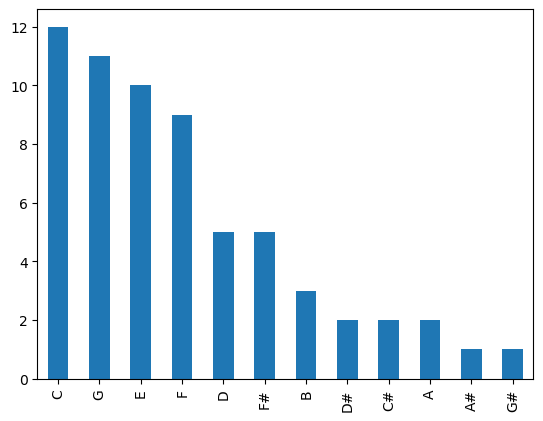

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

average_key['album_key'].value_counts().plot(kind='bar', x="album_name")

In [27]:
plotting_key = average_key.head(20)
average_key['album_key'].unique()

array(['G', 'F', 'D#', 'D', 'C', 'E', 'C#', 'A', 'B', 'A#', 'F#', 'G#'],
      dtype=object)

In [28]:
# data_to_plot = average_key[['album_name', 'album_key']]
# counts = data_to_plot['album_key'].value_counts().values
# counts
# plt.bar(plotting_key['album_name'], plotting_key['key']) 
# plt.xticks(rotation=90)
# plt.show()

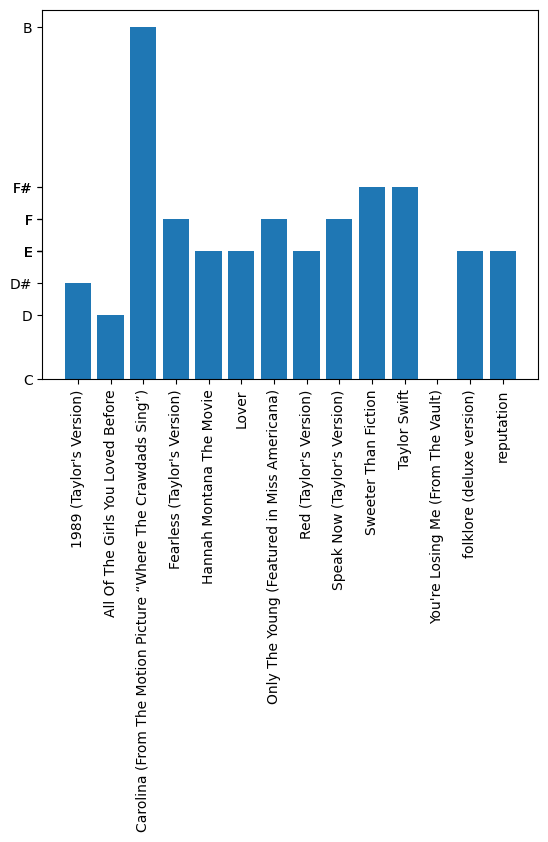

In [29]:
plt.bar(TS_filtered['album_name'], TS_filtered['round_key']) 
plt.xticks(rotation=90)
plt.yticks(TS_filtered['round_key'],TS_filtered['album_key'])
plt.show()

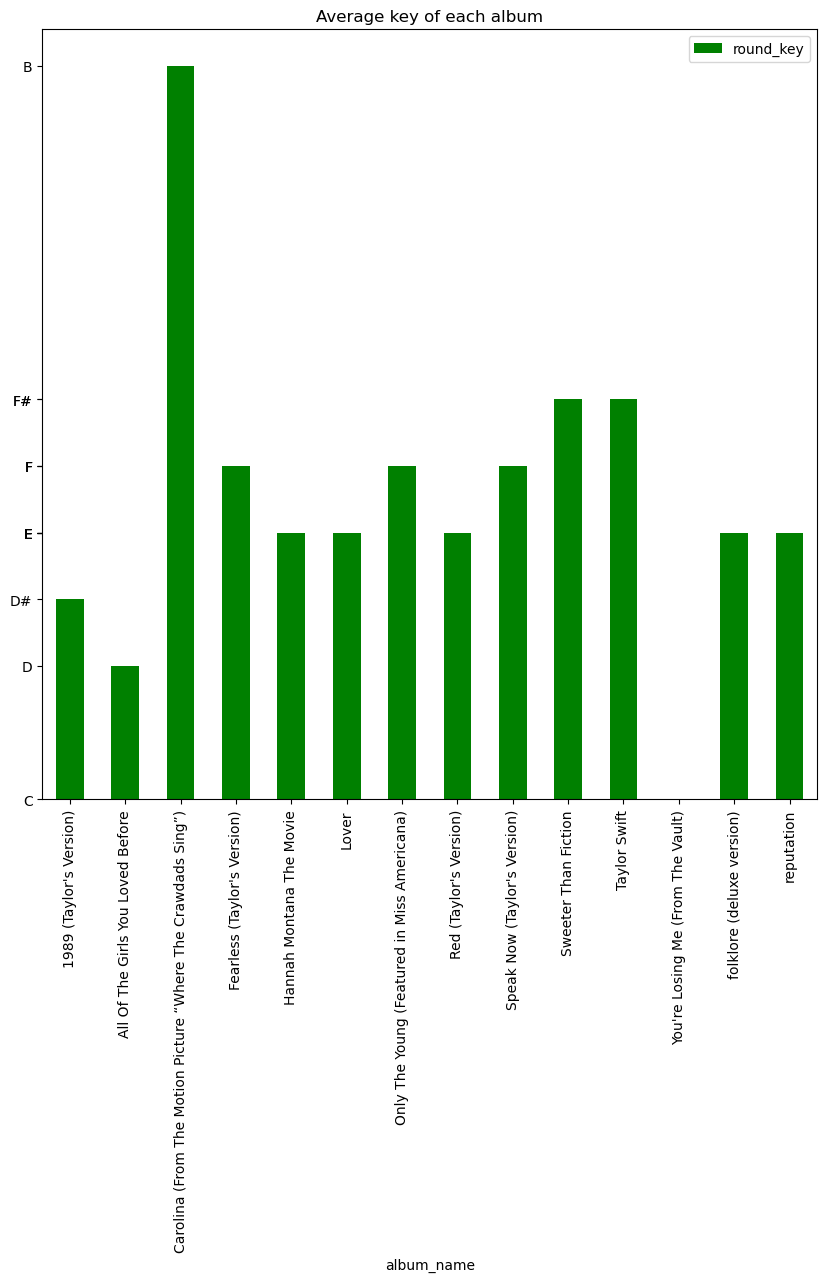

In [30]:
TS_filtered.plot(kind="bar", x ="album_name", y="round_key",
                  title = "Average key of each album", color = 'green', 
                    figsize = (10,10), rot = 90)
plt.yticks(TS_filtered['round_key'],TS_filtered['album_key'])
plt.show()

In [31]:
lover.head()

,album_name,song_name,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,album_key
115,Lover,I Forgot That You Existed,2019-08-23,77,0.664,0.316,5,-10.345,1,0.5190,0.2980,0.000002,0.0812,0.541,92.875,170640,4,F
116,Lover,Cruel Summer,2019-08-23,99,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,178427,4,A
117,Lover,Lover,2019-08-23,93,0.359,0.543,7,-7.582,1,0.0919,0.4920,0.000016,0.1180,0.453,68.534,221307,4,G
118,Lover,The Man,2019-08-23,87,0.777,0.658,0,-5.191,1,0.0540,0.0767,0.000000,0.0901,0.633,110.048,190360,4,C
119,Lover,The Archer,2019-08-23,83,0.292,0.574,0,-9.375,1,0.0401,0.1200,0.005690,0.0663,0.166,124.344,211240,4,C


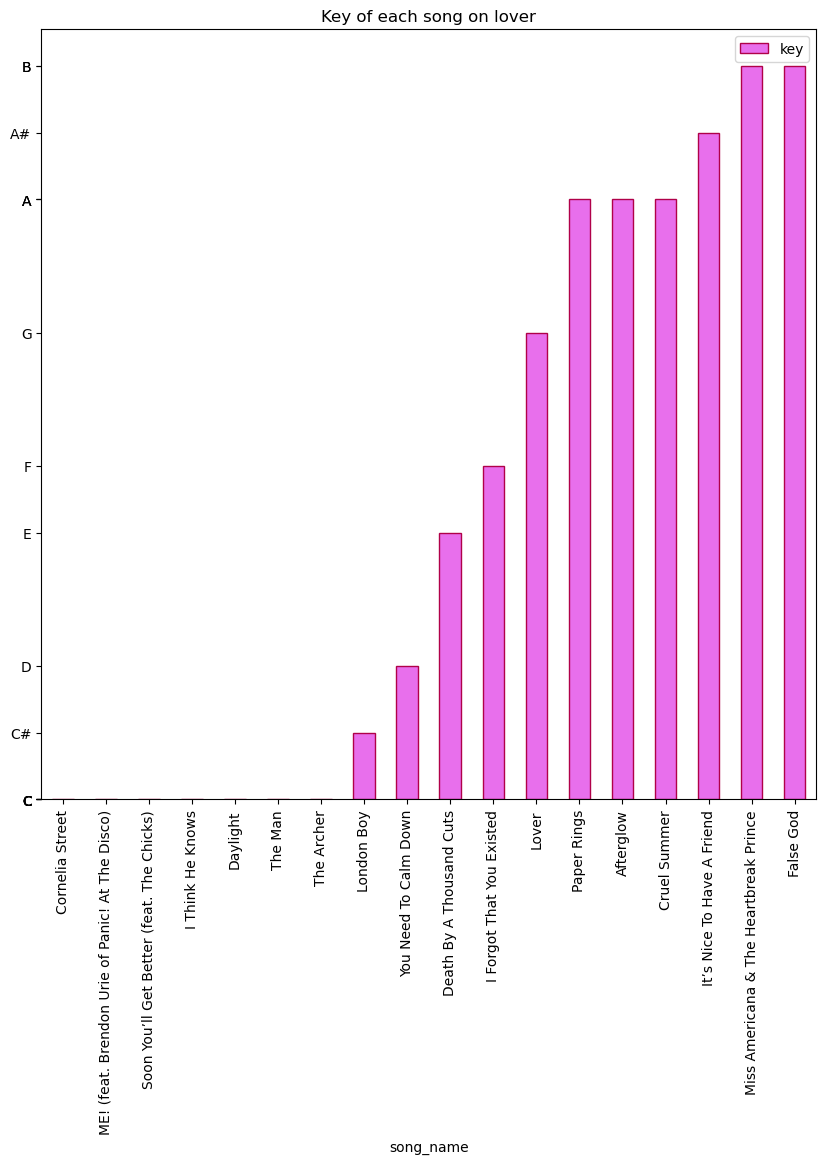

In [32]:
lover.sort_values(by = 'key').plot(kind="bar", x ="song_name", y="key",
                  title = "Key of each song on lover", color = '#E86FEC', 
                    figsize = (10,10), rot = 90,  edgecolor ='xkcd:raspberry')
plt.yticks(lover['key'],lover['album_key'])
plt.show()

In [33]:
color_album = ['#A5C9A5', '#C7A8CB', '#B5E5F8', '#F7B0CC', '#C5AC90', '#EFC180', '#7A2E39', '#746F70', 
               '#CDC9C1', '#242E47']

In [34]:
album_map = {
            'Taylor Swift': '#A5C9A5',
            "Fearless (Taylor's Version)": '#EFC180',
            "Speak Now (Taylor's Version)":'#C7A8CB',
            "Red (Taylor's Version)":'#7A2E39',
            "1989 (Taylor's Version)":'#B5E5F8',
            'reputation':'#746F70',
            'Lover':'#F7B0CC',
            'folklore (deluxe version)': '#CDC9C1',
            'evermore (deluxe version)':'#C5AC90',
            'Midnights (The Til Dawn Edition)': '#242E47'}
# spotify_taylor['album_key'] = spotify_taylor['key'].apply(lambda x: key_map[int(x)])
album_map

{'Taylor Swift': '#A5C9A5',
 "Fearless (Taylor's Version)": '#EFC180',
 "Speak Now (Taylor's Version)": '#C7A8CB',
 "Red (Taylor's Version)": '#7A2E39',
 "1989 (Taylor's Version)": '#B5E5F8',
 'reputation': '#746F70',
 'Lover': '#F7B0CC',
 'folklore (deluxe version)': '#CDC9C1',
 'evermore (deluxe version)': '#C5AC90',
 'Midnights (The Til Dawn Edition)': '#242E47'}

In [35]:
desired_albums2 = ['Taylor Swift', "Fearless (Taylor's Version)","Speak Now (Taylor's Version)",
                  "Red (Taylor's Version)", "1989 (Taylor's Version)",'reputation','Lover',
                  'folklore (deluxe version)', 'evermore (deluxe version)', 'Midnights (The Til Dawn Edition)' ]
is_desired_album1 = average_key['album_name'].isin(desired_albums2)
# Filter the DataFrame using the boolean Series
TS_filtered1 = average_key[is_desired_album1].reset_index()

# album_colors = dict(zip(desired_albums2, color_album))
TS_filtered1['color'] = TS_filtered1['album_name'].apply(lambda x: album_map.get(x))


TS_filtered1

,index,album_name,key,popularity,valence,acousticness,round_key,album_key,color
0,2,1989 (Taylor's Version),3.285714,80.523810,0.422371,0.111264,3.0,D#,#B5E5F8
1,20,Fearless (Taylor's Version),4.538462,71.230769,0.421923,0.214061,5.0,F,#EFC180
2,31,Lover,4.333333,82.055556,0.481444,0.333743,4.0,E,#F7B0CC
3,37,Midnights (The Til Dawn Edition),6.333333,78.333333,0.209133,0.338767,6.0,F#,#242E47
4,39,Red (Taylor's Version),4.333333,73.166667,0.424600,0.176866,4.0,E,#7A2E39
5,44,Speak Now (Taylor's Version),4.954545,76.272727,0.401782,0.182551,5.0,F,#C7A8CB
6,49,Taylor Swift,5.533333,62.466667,0.426533,0.182995,6.0,F#,#A5C9A5
7,59,evermore (deluxe version),5.000000,77.500000,0.530500,0.785000,5.0,F,#C5AC90
8,60,folklore (deluxe version),4.176471,72.058824,0.361353,0.717588,4.0,E,#CDC9C1
9,61,reputation,3.733333,82.133333,0.293400,0.138515,4.0,E,#746F70


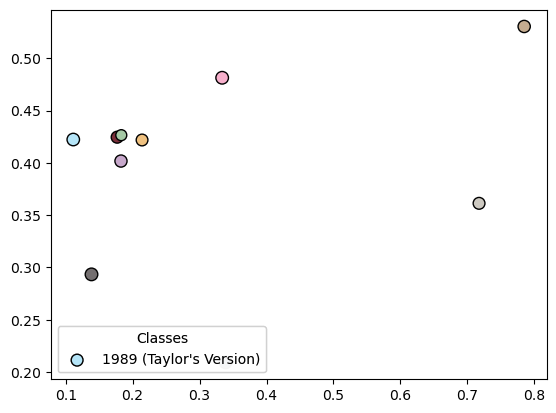

In [36]:
fig, ax = plt.subplots()

scatter = ax.scatter(x=TS_filtered1["acousticness"], y=TS_filtered1["valence"], c=TS_filtered1["color"],
 edgecolor="black",  s= TS_filtered1["popularity"])

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(TS_filtered1["album_name"],
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

plt.show()

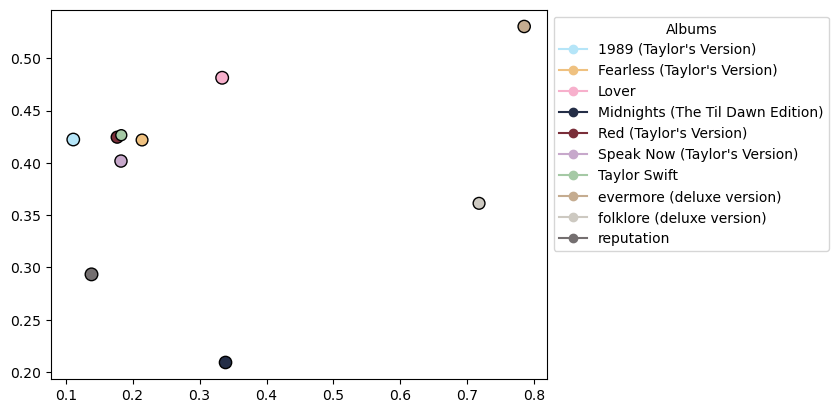

In [37]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Create scatter plot
scatter = ax.scatter(x=TS_filtered1["acousticness"], y=TS_filtered1["valence"],
                      c=TS_filtered1["color"], edgecolor="black", s=TS_filtered1["popularity"])

# Create legend entries manually
handles, labels = [], []
unique_colors = TS_filtered1["color"].unique()  # Get unique colors
for color in unique_colors:
    # Create a proxy artist for each unique color
    proxy = plt.Line2D([0], [0], marker='o', color=color, 
                       label=TS_filtered1[TS_filtered1["color"] == color]["album_name"].iloc[0])  
    # Select representative album name for each color
    handles.append(proxy)
    labels.append(proxy.get_label())

# Create and customize the legend
legend = ax.legend(handles=handles, labels=labels, loc="upper left", title="Albums", bbox_to_anchor=(1, 1))

plt.show()





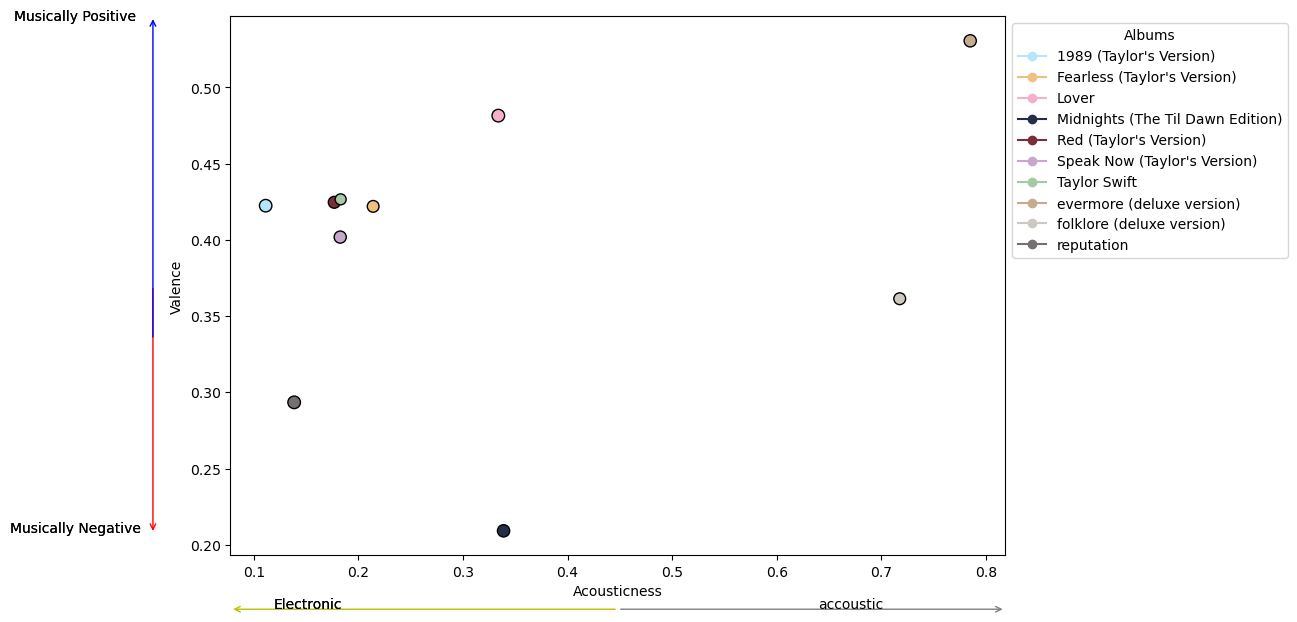

In [189]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch


fig, ax = plt.subplots(figsize=(10, 7))


# Create scatter plot
scatter = ax.scatter(x=TS_filtered1["acousticness"], y=TS_filtered1["valence"],
                      c=TS_filtered1["color"], edgecolor="black", s=TS_filtered1["popularity"])
ax.set_xlabel("Acousticness")
ax.set_ylabel("Valence")

ax.annotate('', xy=(0, -0.1), xycoords='axes fraction', xytext=(.5, -0.1), 
            arrowprops=dict(arrowstyle="->", color='y'))
ax.annotate('', xy=(.5, -0.1), xycoords='axes fraction', xytext=(1, -0.1), 
            arrowprops=dict(arrowstyle="<-", color='grey'))

ax.annotate('', xy=(-.1, 0.5), xycoords='axes fraction', xytext=(-.1, .04), 
            arrowprops=dict(arrowstyle="<-", color='r'))
ax.annotate('', xy=(-.1, .4), xycoords='axes fraction', xytext=(-.1, 1), 
            arrowprops=dict(arrowstyle="<-", color='b'))

positive_label = ax.text(-0.2, 1, "Musically Positive", ha='center', va='center', 
                         transform=ax.transAxes)
negative_label = ax.text(-0.2, 0.05, "Musically Negative", ha='center', va='center', transform=ax.transAxes)
electronic = ax.text(0.1, -.09, "Electronic", ha='center', va='center', 
                         transform=ax.transAxes)
accoustic = ax.text(0.8, -0.09, "accoustic", ha='center', va='center', transform=ax.transAxes)

# Create legend entries manually
handles, labels = [], []
unique_colors = TS_filtered1["color"].unique()  # Get unique colors
for color in unique_colors:
    # Create a proxy artist for each unique color
    proxy = plt.Line2D([0], [0], marker='o', color=color, 
                       label=TS_filtered1[TS_filtered1["color"] == color]["album_name"].iloc[0])  
    # Select representative album name for each color
    handles.append(proxy)
    labels.append(proxy.get_label())

# Create and customize the legend
legend = ax.legend(handles=handles, labels=labels, loc="upper left", title="Albums", bbox_to_anchor=(1, 1))

ax.add_artist(positive_label)
ax.add_artist(negative_label)
ax.add_artist(electronic)


plt.show()